<div style="font-size:1.4em; margin-bottom:2em">
    <div style="float:right; line-height:1.2em;">GET Lab<br />Paderborn University</div>
  <div>SS 2021</div>
</div>
<div style="clear:both"></div>
<div style="text-align:center; font-size:1.8em;">
  Digital Image Processing II<br />Task Sheet 10
</div>

<hr>

### Overview

The objective of this task sheet is to develop a simple object recognition system that distinguishes two classes from the <a href="https://dabi.temple.edu/external/shape/MPEG7/dataset.html">MPEG-7 dataset</a>: *apple* and *bat*. The dataset is often used to evaluate object classification algorithms and consists of binary images of 70 different classes, where each class contains 20 examples. The following figure shows the first five images of the two classes considered here:

<center><img src="images/mpeg7-overview.png" style="margin-bottom:5px;" /></center>

The first step in the development of the object recognition system is feature extraction so that every image is described by a feature vector $\mathbf{x}$. The second step is the implementation of a classifier, in this case a **minimum distance classifier**. The decision function of the minimum distance classifier is given as follows:

$$d_i(\textbf{x})=\textbf{x}^T\textbf{m}_i - \frac{1}{2}\textbf{m}_i^T\textbf{m}_i$$

In this equation, $\textbf{m}_i$ is the mean vector of the feature vectors of that class, which is computed in the training phase. Note that the second term is a constant after the training phase. There are then two possibilities for the classification: either one computes $d_i(\textbf{x})$ for each class and decides for the class with largest numerical value, or one computes the decision boundary $d_{12}(\textbf{x})=d_{1}(\textbf{x})-d_{2}(\textbf{x})$ and decides based on the sign of $d_{12}(\textbf{x})$.

---

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

dpi = plt.rcParams['figure.dpi']

# plot image in original size
def plot_img_orig(img):
    fig = plt.figure(figsize = (img.shape[1]/dpi, img.shape[0]/dpi))
    fig.add_axes([0, 0, 1, 1])
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255) # cmap parameter is ignored for RGB(A) data
    plt.show()

#### <span style="color: RoyalBlue; font-weight: bold;">Task 10.1</span> Feature Extraction

In this example, the feature vectors should be two-dimensional so that $\mathbf{x} = [x_1\ x_2]^T$. This makes it easy to analyze the data in a plot. It is important that the features used are distinctive so that the two classes can be reliably distinguished. This means that the feature vectors are well separated in the feature space. For this task, use the first 15 images of each class (e.g., *apple-1.png*, $\dots$, *apple-15.png*). The remaining 5 images of each class should be classified in the next task.

Implement / solve the following tasks:
1. Write a function to compute a 2D feature vector for a given image (you can choose the features on your own, see below for suggestions).
2. Compute the feature vectors for the first 15 images of each class and use appropriate data structures to store the results. 
3. Plot the features in the 2D feature space. Use a different symbol or color for each class.
4. Evaluate the features with respect to their applicability for the classification.

Suggestions for the features: ratio of black and white pixels as feature 1 ($x_1$) and the ratio of the PCA eigenvalues (largest eigenvalue devided by the smallest) as feature 2 ($x_2$). The PCA eigenvalues correspond to the lengths of the two main axes that describe the distribution of the white pixels. The OpenCV function <a href="https://docs.opencv.org/4.2.0/d2/de8/group__core__array.html#ga4e2073c7311f292a0648f04c37b73781">`PCACompute2`</a> can be used to compute the eigenvalues.

apples =
 [[1.3174794  1.02612077]
 [0.89772398 1.05653021]
 [0.82115267 1.15795857]
 [2.92384146 1.27935373]
 [0.89038883 1.09273644]
 [0.96333134 1.16612454]
 [1.06699047 1.07262802]
 [1.10957317 1.41492942]
 [1.28802849 1.11378592]
 [1.33756599 1.06541495]
 [0.97177844 1.29671832]
 [0.93950873 1.0676718 ]
 [0.82231738 1.20373047]
 [1.30168932 1.1400514 ]
 [0.74089521 1.23181417]]
bats =
 [[3.08716518 4.26269816]
 [2.10685957 9.25857252]
 [6.30589336 9.25761767]
 [1.66041033 5.47850952]
 [4.5280888  5.47881051]
 [2.4805841  4.84043243]
 [6.85009545 4.83986601]
 [1.21924955 5.17569649]
 [4.3037255  5.17617777]
 [3.72817255 5.85418752]
 [9.85302482 5.85461821]
 [1.35468365 6.88734527]
 [4.46022401 6.88875832]
 [2.1697181  2.99324213]
 [5.62197034 2.99344768]]


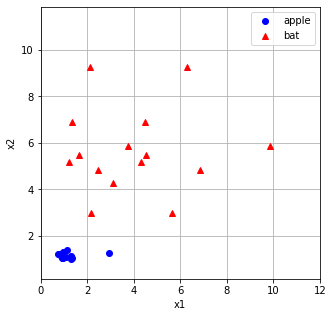

In [2]:
# write your code here

# compute 2D feature vector for given image
def getFeatures(img):
    # determine image size
    rows, cols = img.shape
    
    # use the ratio of black and white pixels as feature 1 (x1)
    noWhitePx = cv2.countNonZero(img)
    noBlackPx = (rows*cols) - noWhitePx;
    
    x1 = noBlackPx / noWhitePx;
    
    # use the ratio of the PCA eigenvalues (largest/smallest) as feature 2 (x2)
    whitePx = (np.transpose(img.nonzero())).astype(np.float64) # vector coordinates of white pixels
    mean, eigenvectors, eigenvalues = cv2.PCACompute2(whitePx, mean=None) # PCACompute2 requires float64 format
    #print(mean); print(eigenvectors); print(eigenvalues)
    
    if eigenvalues[0] > eigenvalues[1]:
        x2 = float(eigenvalues[0] / eigenvalues[1])
    else:
        x2 = float(eigenvalues[1] / eigenvalues[0])

    # return result
    return x1, x2

# create 2d array to save the 2 features
# each row represents one pair of features x1 and x2
apples = np.empty(shape=[0, 2])
bats = np.empty(shape=[0, 2])

# compute features
for i in range(1,16): # i from 1 to 15
    img = cv2.imread("images/mpeg7-apple/apple-" + str(i) + ".png", 0)
    x1, x2 = getFeatures(img)
    apples = np.append(apples, [[x1, x2]], axis=0)
    
    img = cv2.imread("images/mpeg7-bat/bat-" + str(i) + ".png", 0)
    x1, x2 = getFeatures(img)
    bats = np.append(bats, [[x1, x2]], axis=0)

# print the results
print("apples =\n", apples)
print("bats =\n", bats)

# plot the features in the 2D feature space
plt.figure(figsize=(5, 5))

plt.plot(apples[:,0], apples[:,1], 'bo', label='apple')
plt.plot(bats[:,0], bats[:,1], 'r^', label='bat')

plt.xlabel('x1'); plt.ylabel('x2')
plt.axis("equal")
plt.xlim(0, 12); plt.ylim(0, 12)

plt.grid()
plt.legend()
plt.show()

The classes are well separated so that the features $x_1$ and $x_2$ are suitable for the classification. The class *apple* has one outlier. This is the image *apple-4.png*, where the image is much larger than the apple (much more black pixels so that $x_1$ becomes larger). In such cases, it might be good a strategy to crop the objects in a preprocessing step. The general form of the bats is much more variable than the form of the apples. This is why the class *bat* spreads over a larger area in the feature space. In general, both features used are scale and rotation invariant.

We can see an additional interesting property here: if we project the features on the $x_2$-axis, the classes are already well separated. As a result, $x_2$ alone is a sufficient feature and we can work in 1D. This is because the apples have a characteristic circular form ($x_2 \approx 1$), while there are major differences between the two axes for the bats. The numerical values confirm this.

#### <span style="color: RoyalBlue; font-weight: bold;">Task 10.2</span> Minimum Distance Classifier

In the 2D case as it is considered here, the decision function of the minimum distance classifier can be rewritten as follows:

$$
d_i(\textbf{x})
= \textbf{x}^T\textbf{m}_i - \frac{1}{2}\textbf{m}_i^T\textbf{m}_i
= [x_1\ x_2] \begin{bmatrix}m_{x_1, i}\\ m_{x_2, i}\end{bmatrix} - \frac{1}{2}\textbf{m}_i^T\textbf{m}_i
= m_{x_1, i} x_1 + m_{x_2, i} x_2 - c_i
$$

As the second term is constant for each class, it can be denoted $c_i$. The corresponding decision boundary can then be computed based on the following function:

$$
d_{12}(\textbf{x})
= d_{1}(\textbf{x})-d_{2}(\textbf{x})
= (m_{x_1, 1} x_1 + m_{x_2, 1} x_2 - c_1) - (m_{x_1, 2} x_1 + m_{x_2, 2} x_2 - c_2)
$$
$$
= (m_{x_1, 1}-m_{x_1, 2}) x_1 + (m_{x_2, 1}-m_{x_2, 2}) x_2 - (c_1-c_2)
= \Delta m_{x_1} x_1 + \Delta m_{x_2} x_2 - \Delta c_i
$$

New examples can be classified based on the sign of this function ($d_{12}(\textbf{x}) > 0$ for class 1 and $d_{12}(\textbf{x}) < 0$ for class 2). The function of the decision boundary can be computed by setting $d_{12}(\textbf{x}) = 0$. This leads to:

$$x_2 = f(x_1) = \frac{1}{\Delta m_{x_2}} (\Delta c_i - \Delta m_{x_1} x_1)$$

Implement / solve the following tasks:
1. Compute and plot the decision boundary of the minimum distance classifier.
2. Use the corresponding decision function to classify the remaining 5 images of the classes *apple* and *bat*.

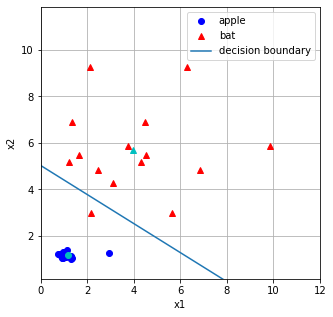

class apple
class apple
class apple
class apple
class apple
class bat
class bat
class bat
class bat
class bat


In [3]:
# write your code here

# compute the mean values
mean_apples = np.mean(apples, axis=0)
mean_bats = np.mean(bats, axis=0)

# compute the decision boundary
dm1 = mean_apples[0]-mean_bats[0]
dm2 = mean_apples[1]-mean_bats[1]
dci = 0.5*np.dot(mean_apples, mean_apples) - 0.5*np.dot(mean_bats, mean_bats)

# plot features and mean values in feature space
plt.figure(figsize=(5, 5))

# plot of the feature vectors
plt.plot(apples[:,0], apples[:,1], 'bo', label='apple')
plt.plot(bats[:,0], bats[:,1], 'r^', label='bat')

# plot of the mean vectors
plt.plot(mean_apples[0], mean_apples[1], 'co') # mean values in cyan
plt.plot(mean_bats[0], mean_bats[1], 'c^')

# plot of the decision boundary
x1 = np.arange(0, 10, 0.01) # range of x1
x2 = (1.0/dm2) * (dci - dm1*x1)
plt.plot(x1, x2, label='decision boundary')

plt.xlabel('x1'); plt.ylabel('x2')
plt.axis("equal")
plt.xlim(0, 12); plt.ylim(0, 12)

plt.grid()
plt.legend()
plt.show()

# classify apples
for i in range(16,21): # i from 16 to 20
    img = cv2.imread("images/mpeg7-apple/apple-" + str(i) + ".png", 0)
    x1, x2 = getFeatures(img)
    
    if (dm1*x1+dm2*x2-dci) > 0:
        print("class apple")
    else:
        print("class bat")
    
# classify bats
for i in range(16,21): # i from 16 to 20
    img = cv2.imread("images/mpeg7-bat/bat-" + str(i) + ".png", 0)
    x1, x2 = getFeatures(img)

    if (dm1*x1+dm2*x2-dci) > 0:
        print("class apple")
    else:
        print("class bat")